In [1]:

# Install and Activate Packages
#install.packages("twitteR", "RCurl", "RJSONIO", "stringr")
library(twitteR)
library(RCurl)
library(RJSONIO)
library(stringr)



library(NLP)
library(Rstem)
library(SnowballC)
library(ROAuth)
require(RCurl)
library(stringr)
library(tm)
library(ggmap)
library(dplyr)
library(plyr)
library(wordcloud)
library(glmnet)
library(e1071)



Warning message:
"package 'twitteR' was built under R version 3.4.2"Loading required package: bitops
Warning message:
"package 'stringr' was built under R version 3.4.2"
Attaching package: 'SnowballC'

The following objects are masked from 'package:Rstem':

    getStemLanguages, wordStem

Warning message:
"package 'ROAuth' was built under R version 3.4.2"Warning message:
"package 'tm' was built under R version 3.4.2"Warning message:
"package 'ggmap' was built under R version 3.4.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.2"
Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate

Warning message:
"package 'dplyr' was built under R version 3.4.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:twitteR':

    id, location

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, s

In [10]:
# Declare Twitter API Credentials
api_key <- "wD9XB3nCUR7EKQmT9qyQRASn2" # From dev.twitter.com
api_secret <- "9sNLGekY6G6QuubDoU8wBIHhw36HIZjfGo3a1wBmRA21J7NgXl" # From dev.twitter.com
token <- "864455585286299648-SnWXOgAa775L2WluyIuSI5ysCA5uOom" # From dev.twitter.com
token_secret <- "NdQfLtSHBWmN6suu9l16yW4FYZymSJRZG4T5lRtWCZSaS" # From dev.twitter.com

# Create Twitter Connection
setup_twitter_oauth(api_key, api_secret, token, token_secret)

# Run Twitter Search. Format is searchTwitter("Search Terms", n=100, lang="en", geocode="lat,lng", also accepts since and until).

tweets <- searchTwitter("Bitcoin", n=5000, lang="en", since="2014-08-20")

# Transform tweets list into a data frame
tweets.df <- twListToDF(tweets)
length(tweets.df$text)

# Use the searchTwitter function to only get tweets within 50 miles of Los Angeles
#tweets_geolocated <- searchTwitter("Obamacare OR ACA OR 'Affordable Care Act' OR #ACA", n=5000, lang="en", geocode='34.04993,-118.24084,50mi', since="2014-08-20")
#tweets_geoolocated.df <- twListToDF(tweets_geolocated)

tweets.text <- tweets.df$text


[1] "Using direct authentication"


[1] 5000

In [17]:
# Create corpus
corpus=Corpus(VectorSource(tweets.text))


# Remove stopwords
corpus=tm_map(corpus,function(x) removeWords(x,stopwords()))

# convert corpus to Plain Text
corpus=tm_map(corpus,PlainTextDocument)

corpus <- gsub('[[:punct:]]', '', corpus)
corpus <- gsub('[[:cntrl:]]', '', corpus)
corpus <- gsub('\\d+', '', corpus)
# Convert to lower-case
#corpus=tm_map(corpus,tolower)






In [16]:
corpus <- wordStem(corpus, language = "english")
corpus

[1] "listcontent  cBtc shorts getting rekt crypto bitcoin Bitcoin rebounds    US regulator approves futures LONDON Reuters  Bitcoin rebounded  Friday  httpstcoNvtnXvs RT REGA We  making Crowdsurance Revolution nhttpstcoPxjmnZRfn nnethereum blockchain bitcoin cryptocurrency RT DaiIyMemeSuppIy buys  bitcoinnnchanges bio nninvestor amp entrepreneur edUAUBDedUBUB BTC edUAUBDedUBUB living life in the sky UUFEF UUFEF eat sleep bit RT business From    All  need  know  bitcoin httpstcorInDQEGk httpstcoDZFGmSy RT LanceRoberts TheBubbleBubble you say Bitcoin  soaring  people fear fiat debasement That  exactly  bitcoin  represen RT stevedekorte This Bitcoin price chart  insane Oh wait s actually  chart  US dollar money printing httpstcoEfzgJQpy Cointelegraph My experience    I    worst enemy  trading Impulses    reigned  It  httpstcoTzSVKHjFEg RT maxkeiser New ATH today Bitcoin httpstcoGEFMwIJol RT DaiIyMemeSuppIy buys  bitcoinnnchanges bio nninvestor amp entrepreneur edUAUBDedUBUB BTC edUAUBDedUBUB living life in the sky UUFEF UUFEF eat sleep bit RT petertoddbtc ProTip Bitcoin    instant payments httpstcoUFFXdeJhg A Few Ways  Claim Bitcoin Gold httpstcolVfSZRj bitcoin httpstcoeCZezCjUw RT fintabio Bounty Program RestartnWe  taken  mistakes   old program  consideration  implemented  new ideasnAn RT Reuters Morning Briefing US tax plan hits rough waters sources speculate  White House staff changes  Bitcoin hovers around  Hear hear Im  millennial   w  guys   one httpstcoGeyhFOeND RT businessinsider US regulators just gave  green light  bitcoin futures trading httpstcokcgZLfjl httpstcoFmcAXullh A Few Ways  Claim Bitcoin Gold httpstcofSiyXlouX BTC ETH Crypto httpstcozjVWRCjzM RT CryptoCopy Interesting view   cryptocurrencies now   happen   future httpstcoGxFTiiqaQd RT business Bitcoin    says Goldman Sachs CEO Lloyd Blankfein httpstcoTnTHWpcWH httpstcoMdLBicVS Regulator Opens Way  Bitcoin Futures httpstcoxjVBoxl A Few Ways  Claim Bitcoin Gold httpstcocSDZQPUua bitcoin httpstcoHPzaefDeR RT oumbharti  RBI SEBIIndia FinMinIndia Bring positive policy  expand bitcoin cryptocurrencies trading Investment mining  f RT langpieproject edUAUBCedUBEUAF Lets gonICO bitcoin cryptocurrency ethereum httpstcoLPtXDFt RT willyclicks Funny examples  Chinese counterfeiting Abibas Panasonix Samcung Nokla Bitcoin Cash Hike SqonynnJihanWu roger RT BrilliantAds First Big Company McDonalds  accept Bitcoin   Who  next httpstcoaFGegzZDu A Few Ways  Claim Bitcoin Gold httpstcorgNRnioK bitcoin httpstcokvyysdx We just got  glimpse   bitcoin futures will work httpstcoyCWRZdRxZl ROIMentor RT AndyHoffmanCG The OLD MEN   run  world  centuries  FIAT CURRENCy want POWER  The yOUNG MEN AND WOMEN  will ta I   going  share  news story  PwC accepting client payment  Bitcoin      project wit httpstcoVAsRhhnWX Bitcoin    httpstcoSLUZOAnm httpstcojbKeZDDNM US regulator says  will allow CME Group CBOE  list bitcoin futures httpstcouppTANPMh Bitcoin bubble grows  banks fall flat httpstcoKzqOdwQ Bitcoin Futures Get Official Green Light From Regulators  httpstcoCSQJNT via technology News Forex ReportV edUAUBDedUBU Bloomberg New thinking at the central bank of central banks see  more info gtgtgt httpstcoQUFmNVOmXf Bitcoin futures trading gets  green light  US regulators httpstcoNgvUkDx ROIMentor US REGULATORS TO ALLOW BITCOIN FUTURES TO TRADE ON CME CBOE RT AMLTToken Dear AMLT community  created  official announcements Telegram channel   Token Sale Make sure  join https RT markets Bitcoin rises  announcment  CME  CBOE will start listing futures httpstcorBDHvXvlK httpstcoegqeNSK Who  saying BTC    crashn Bitcoin equalsn US Dollars RT ElectrekCo Tesla owner builds  bitcoin mining rig   Model S  use free Supercharger power httpstcoxNEAMXLP httpstcof RT REGA REGA   first platform  implements risksharing smart contracts   Ethereum Platform  provides  standard RT bonnovanderputt Equities UUFEFedUAUBCedUBCUUBUFEF The trophy was yesterday The challenge is everyday equities stocks IPO Online retail

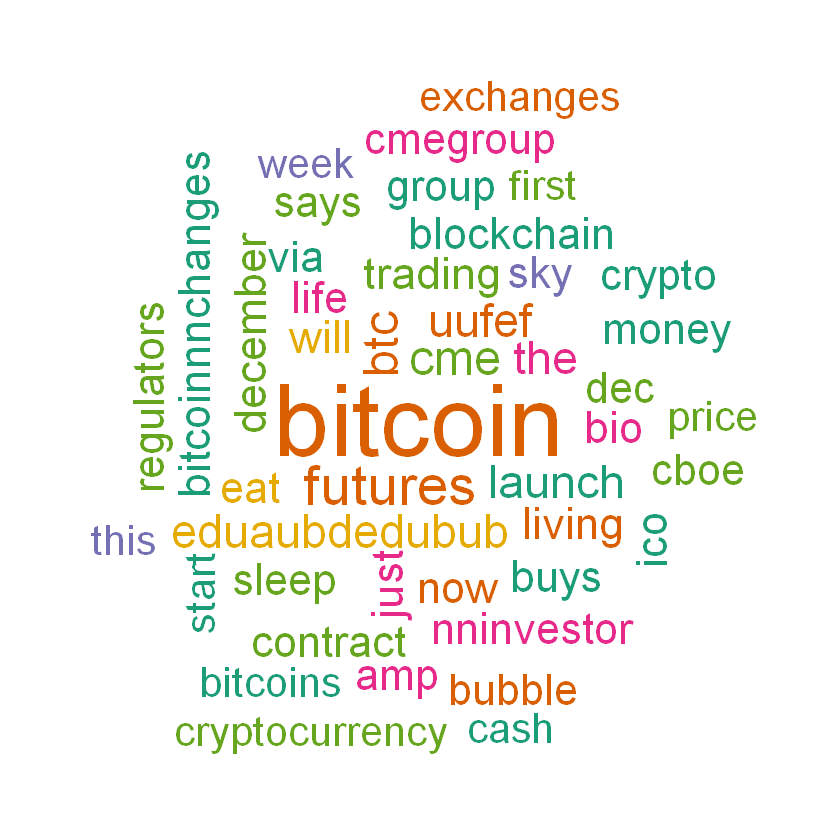

In [18]:
col=brewer.pal(6,"Dark2")
wordcloud(corpus, min.freq=25, scale=c(5,2),rot.per = 0.25,
          random.color=T, max.word=45, random.order=F,colors=col)

In [7]:
positives <- readLines("C:/Users/Mayur/Documents/Advance Data Science/Assignments_SDas/Assignment_8/positivewords.txt")
negatives <- readLines("C:/Users/Mayur/Documents/Advance Data Science/Assignments_SDas/Assignment_8/negativewords.txt")

dataFile <- tweets.text

In [25]:
sentimentScore <- function(dataFile, negatives, positives){
  final_scores <- matrix('', 0, 3)
  scores <- laply(dataFile, function(dataFile, negatives, positives){
    initial_dataFile <- dataFile
    
    #data cleaning and remove punctuation 
    dataFile <- gsub('[[:punct:]]', '', dataFile)
    dataFile <- gsub('[[:cntrl:]]', '', dataFile)
    dataFile <- gsub('\\d+', '', dataFile)
    dataFile <- wordStem(dataFile, language = "english")
    dataFile <- dataFile[dataFile != 'RT @TotumTeam: What are you waiting for? Right now you can make the most profitable choice in your life!í ½í´
#ico #preico #start #business #blâ€¦']
    dataFile <- tolower(dataFile)
    wordList <- str_split(dataFile, '\\s+')
    words <- unlist(wordList)
    
    #build vector containing matches
    positive_matches <- match(words, positives)
    negative_matches <- match(words, negatives)
    
    #sum up number of words
    positive_matches <- sum(!is.na(positive_matches))
    negative_matches <- sum(!is.na(negative_matches))
    
    score <- c(negative_matches, positive_matches)
    
    newrow <- c(initial_dataFile, score)
    final_scores <- rbind(final_scores, newrow)
    return(final_scores)
  }, negatives, positives)
  return(scores)
}
#sentimentScore

In [153]:
#build tables with score
result <- as.data.frame(sentimentScore(dataFile, negatives, positives))
#result <- cbind(result, 'result')
colnames(result) <- c('Review', 'Negatives', 'Positives')

head(result)

Review                                                                                                                             
1 Ripple Price Forecast Federal Reserve Touts XRP Speed and Usefulness httpstcoKSoqqZbi httpstcoBIQtNdHFr                            
2 RT cryptonetix Made by traders for tradershttpstcoZJvRktcGe ICO cryptocurrency ETH BTC                                             
3 RT HashChainTech Cryptocurrency is the biggest financial opportunityof the next decade  Bob Greifeld Chairman and Former CEO of
4 Russias Central Bank Issues Cryptocurrency Bubble Warning Rinse Repeat  Theblogweb lt   httpstcoxfRSiOi                            
5 RT LiveTreeHQ Check out BitcoinBadgers interview with the CEO of LiveTree ADEPT httpstcoAHdprldmV Reserve your spot in the token  
6 RT LydianCoinLtd Lot  of PreICO for LydianCoinLtd Almost GonePurchase Your LDN Tokens here httpstcoOKTgsUCiWthenextbigthin        
  Negatives Positives
1 1         0        
2 0         0        
3 0         0        
4 2         0        
5 0         0        
6 0         0

In [76]:
dataFile <- gsub('[[:punct:]]', '', dataFile)
dataFile <- gsub('[[:cntrl:]]', '', dataFile)
dataFile <- gsub('\\d+', '', dataFile)
dataFile <- wordStem(dataFile, language = "english")
head(dataFile)

[1] "Ripple Price Forecast Federal Reserve Touts XRP Speed and Usefulness httpstcoKSoqqZbi httpstcoBIQtNdHFr"                            
[2] "RT cryptonetix Made by traders for tradershttpstcoZJvRktcGe ICO cryptocurrency ETH BTC"                                             
[3] "RT HashChainTech Cryptocurrency is the biggest financial opportunityof the next decade  Bob Greifeld Chairman and Former CEO of"
[4] "Russias Central Bank Issues Cryptocurrency Bubble Warning Rinse Repeat  Theblogweb lt   httpstcoxfRSiOi"                            
[5] "RT LiveTreeHQ Check out BitcoinBadgers interview with the CEO of LiveTree ADEPT httpstcoAHdprldmV Reserve your spot in the token"  
[6] "RT LydianCoinLtd Lot  of PreICO for LydianCoinLtd Almost GonePurchase Your LDN Tokens here httpstcoOKTgsUCiWthenextbigthin"

In [154]:
summary(result)
dim(result)

                                                                                                                                                                                                                                       Review    
 RT ramontwitt <U+653C><U+3E64><U+613C><U+3E30><U+623C><U+3E64><U+653C><U+3E64><U+623C><U+3E32><U+613C><U+3E64> I heard in my childhood urban tales about discovering buried pot of golds or grandparents buying cheap shares becoming ri:  91  
 RT SpectreAI SpectreAI has attracted attention from far and wideWe have been featured in a number of press and media outletsTake a                                                                                                      :  61  
 RT vovik COUNTDOWN Just  Days to TokenPays Coin SaleRegister now at httpstcoUIhiqiXT Bonuses run Dec th  th bi                                                                                                                          :  47  
 RT AppCoinsProject Today at the

[1] 5000    3

In [155]:
result <- data.frame(result)

In [156]:
sapply(result, class)

Review Negatives Positives 
 "factor"  "factor"  "factor"

In [157]:
class(result$Negatives) <- 'numeric'
class(result$Positives) <- 'numeric'

In [158]:
sapply(result, class)

Review Negatives Positives 
 "factor" "integer" "integer"

In [159]:
result$Sentiments <- NA


In [160]:
result$Sentiments <- result$Positives - result$Negatives

# if difference in Positive then set Sentiments to 2; if Sentiments == 0 then 0; if Sentiments == Negative then 2

In [161]:
ifelse(result$Sentiments>0, 1, ifelse(result$Sentiments<0, 2,0))

[1] 2 0 0 2 0 0 0 1 0 0 0 1 0 0 0 2 0 1 0 0 1 0 0 0 0 1 1 1 1 0 2 1 0 0 0 0 0
  [38] 0 1 0 1 0 0 0 1 0 0 1 1 1 2 0 0 0 2 0 2 1 2 2 0 2 0 0 1 0 0 2 2 0 0 2 0 2
  [75] 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0
 [112] 2 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 2 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0
 [149] 0 2 0 2 0 1 1 1 1 0 1 0 0 0 1 0 2 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 2 2 2
 [186] 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 2 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 2
 [223] 0 1 0 1 0 0 0 0 2 1 1 0 0 0 0 0 1 0 1 1 0 1 0 2 1 0 1 2 1 1 0 0 0 1 1 1 2
 [260] 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 2 1 0 0 1 0 0 1 1 2 1 0 0 0
 [297] 0 2 1 1 0 1 1 1 0 2 0 0 0 0 1 0 0 0 0 2 2 0 1 0 1 1 1 1 1 0 0 2 1 0 1 0 1
 [334] 2 1 2 1 2 1 0 2 0 0 1 1 0 2 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 [371] 1 0 0 0 0 1 0 0 1 0 2 0 0 2 2 0 0 1 0 0 2 0 1 0 1 0 0 1 1 0 1 0 2 2 0 0 0
 [408] 1 0 0 1 0 0 2 2 0 0 0 1 0 1 2 0 0 1 0 0 1 0 0 1 0 1 2 0 1 0 1 2 2 2 0 0 0
 [445] 0 0 1 0 2 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 2 1 2 1 0 0 1 0 1 0 0 0 0 0 2 1
 [482] 0 0 0 0 2 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 2 0 2 0 1 0 2 1 1 1 1 0 0 0
 [519] 0 1 1 1 0 0 1 1 1 0 2 0 0 1 0 0 1 0 0 1 0 2 1 0 0 0 1 2 1 0 1 0 0 0 1 1 0
 [556] 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 2 0 0 0 1 2 0 1 1 1 0 0 0 0 1 2 0 0
 [593] 2 0 1 0 0 1 0 0 0 0 1 0 2 0 1 0 2 1 2 0 1 2 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 [630] 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 2 0 1 0 1 0 2 0 1 0 0 0 1 0 1 0 0 0 2
 [667] 0 1 1 1 2 0 0 0 0 1 0 0 0 1 1 0 1 0 2 2 0 1 0 1 2 1 0 0 0 0 1 0 0 0 1 2 1
 [704] 0 0 2 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 2 0 1 0 0 0 2 1 0 0 1 1 0 1 2
 [741] 0 1 0 1 2 0 1 2 0 0 1 2 0 0 0 0 0 1 0 1 0 0 1 1 2 1 2 1 0 0 2 1 0 0 0 2 2
 [778] 0 0 1 1 0 0 1 1 2 1 0 0 1 0 0 2 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1
 [815] 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 2 1 1 0 0
 [852] 0 1 1 0 0 2 1 0 0 1 0 0 2 1 0 0 1 0 0 2 0 0 1 0 0 0 0 0 2 1 0 0 0 2 1 1 0
 [889] 2 0 1 1 1 0 0 2 0 0 2 0 2 0 1 0 0 0 0 0 0 2 2 1 0 0 0 0 0 1 1 0 0 1 1 0 1
 [926] 0 0 0 0 0 1 0 2 0 2 1 1 1 0 0 0 0 0 0 0 1 0 2 1 1 0 1 0 2 1 1 0 0 0 2 0 1
 [963] 1 2 0 1 2 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 2 1 0 0 0 2 1 1 0 0 2 0 0 0
[1000] 0 1 0 1 1 1 0 2 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 2 0 0 0 1 0 1 1 1 0
[1037] 1 1 0 2 1 2 0 1 1 1 0 0 0 1 1 0 0 1 0 0 2 2 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1
[1074] 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 2 1 1 0 1 0 0 1 0 0 0 2 0 0 2 0 0 0 2 0 1
[1111] 0 0 0 0 0 0 0 0 0 2 1 2 0 0 0 1 0 0 0 1 2 0 0 1 0 0 1 0 0 2 0 1 1 0 0 2 0
[1148] 0 2 0 0 0 2 0 0 1 0 1 1 1 0 0 1 0 2 0 1 0 1 2 0 1 1 0 1 0 2 0 2 2 0 0 1 1
[1185] 1 0 2 0 2 0 2 1 0 1 0 1 2 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0
[1222] 1 0 2 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 2
[1259] 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 2 1 0 0 0 0 0 0 1
[1296] 0 0 0 0 1 2 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 2 0 0 0 0 0 1 0 0 0 1 1 1 1 0
[1333] 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 2 0 2 0 0 0 0 2 0 0 0 0
[1370] 0 0 0 0 1 0 0 2 0 2 1 1 1 1 0 1 1 1 1 1 2 0 1 0 1 0 0 0 1 0 2 0 2 2 1 0 0
[1407] 0 1 0 0 0 0 1 1 2 1 1 0 0 2 1 1 2 1 1 0 1 2 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1
[1444] 0 1 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 1 0 0 0 0 0 1 0 0 0 2 0 1 1 0 0 1 0 0 1
[1481] 1 1 1 0 1 0 1 0 0 0 1 0 1 2 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1
[1518] 0 0 1 0 2 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 2 0 0 0 0 1 0 2 1 1 0 0 2 1 0 0 0
[1555] 1 0 1 1 2 1 1 0 1 1 2 0 0 0 2 0 2 2 1 0 0 1 0 2 2 0 0 0 1 0 0 1 1 0 2 0 0
[1592] 1 2 1 2 2 0 0 0 0 2 0 0 0 1 0 1 2 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 2 0
[1629] 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 2
[1666] 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 2 0 1 1 0 1 0 0 1 2 0 0 0
[1703] 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 2 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 2 0 0 2
[1740] 0 0 1 1 0 0 0 0 2 1 2 1 0 0 0 0 0 0 0 0 0 0 0 1 0 2 2 0 0 0 0 1 2 1 1 0 0
[1777] 1 0 0 1 0 1 0 0 2 1 0 2 1 1 0 1 2 1 0 0 0 0 0 1 1 0 2 1 0 0 1 0 2 2 1 1 1
[1814] 1 0 0 1 0 0 0 0 2 1 2 2 2 0

In [162]:
result[result$Sentiments>0, "Sentiments"] <- 1
result[result$Sentiments<0, "Sentiments"] <- 2

In [163]:
class(result$Sentiments)

[1] "numeric"

In [164]:
str(result$Sentiments)

 atomic [1:5000] 2 0 0 2 0 0 0 1 0 0 ...
 - attr(*, "levels")= chr [1:6] "0" "1" "2" "3" ...


In [165]:
sample <- sample.int(n = nrow(result), size = floor(.80*nrow(result)), replace = F)
train <- result[sample, ]
test  <- result[-sample, ]

nrow(result)
nrow(train)
nrow(test)

[1] 5000

[1] 4000

[1] 1000

In [166]:
length(result[which(result$Sentiments == 0),2])

[1] 2740

In [167]:
library(e1071)


In [168]:
model <- naiveBayes(Sentiments ~ ., data = result)
class(model)
summary(model)
print(model)

[1] "naiveBayes"

        Length Class  Mode     
apriori 3      table  numeric  
tables  3      -none- list     
levels  6      -none- character
call    4      -none- call     


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
     0      1      2 
0.5480 0.3484 0.1036 

Conditional probabilities:
   Review
Y    Agus stated that he has threatened action against bitcoin adopters if the cryptocurrency is used as a method of payment TGIF
  0                                                                                                                  0.0003649635
  1                                                                                                                  0.0000000000
  2                                                                                                                  0.0000000000
   Review
Y    At the time the coins he owned would have been worth about  million Read more on our newsroundup here httpstcoLpdStdIf
  0                                                                                                             0.0000000000
  1 

In [179]:
preds <- predict(model, newdata = test[,names(test) != "Sentiments"])

In [190]:
class(preds) <- 'numeric'

In [180]:
length(preds)

[1] 1000

In [189]:
library('forecast')
accuracy(test$Sentiments,preds)

ME    RMSE MAE MPE      MAPE    
Test set 0.998 1    1   76.23333 76.43333

In [188]:
table(pred = preds, Actual = test$Sentiments)

    Actual
pred   0   1   2
   1 558   0   1
   2   0 350   0
   3   0   0  91

In [187]:
error <- test$Sentiments - preds
rmse <- sqrt(mean(error^2))
mae <- mean(abs(error))
paste("Root Mean Square of Response & Predicted_Response:", rmse)

[1] "Root Mean Square of Response & Predicted_Response: 1"